In [1]:
import json
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.stats as stat

In [2]:
time = datetime.datetime.now()
train_data = pd.read_json('../train.json')
print datetime.datetime.now() - time

test_data = pd.read_json('../test.json')
print datetime.datetime.now() - time
print train_data.shape
print test_data.shape

0:00:01.857558
0:00:05.843875
(49352, 15)
(74659, 14)


In [3]:
train_data.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


In [4]:
print train_data[['building_id','display_address','listing_id','manager_id',
                 'street_address']].apply(lambda col: col.nunique())

building_id         7585
display_address     8826
listing_id         49352
manager_id          3481
street_address     15358
dtype: int64


In [5]:
print train_data['photos'].apply(len).describe()

count    49352.000000
mean         5.606946
std          3.632283
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         68.000000
Name: photos, dtype: float64


In [6]:
print min(train_data['created'].apply(lambda d: d[:10]))
print max(train_data['created'].apply(lambda d: d[:10]))

2016-04-01
2016-06-29


In [7]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


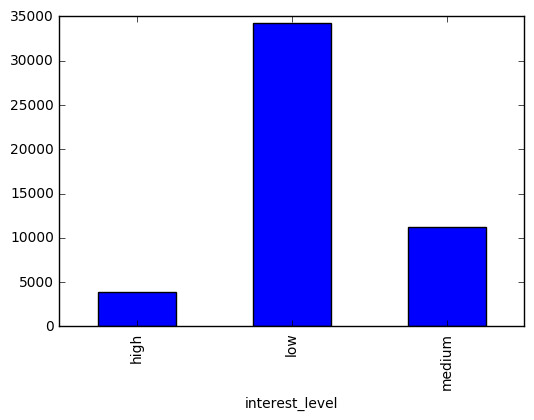

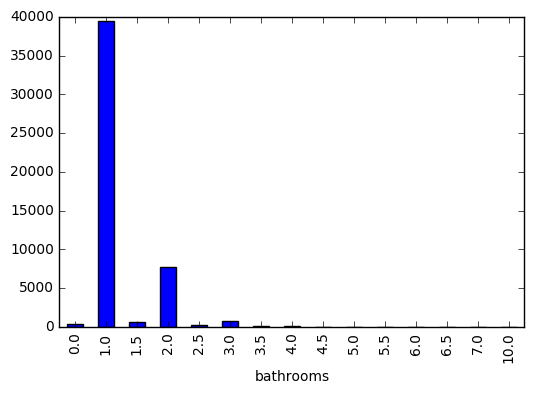

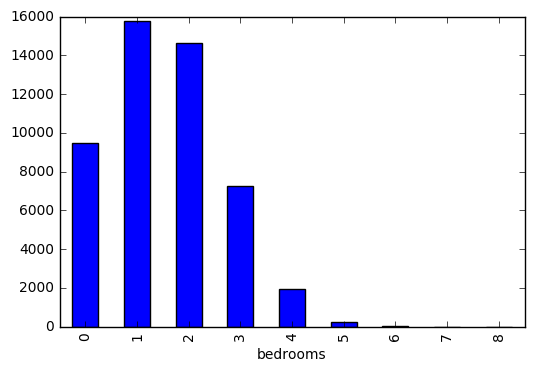

In [8]:
plt.figure()
train_data.groupby('interest_level').listing_id.count().plot(kind='bar')
plt.figure()
train_data.groupby('bathrooms').listing_id.count().plot(kind='bar')
plt.figure()
train_data.groupby('bedrooms').listing_id.count().plot(kind='bar')
plt.show()

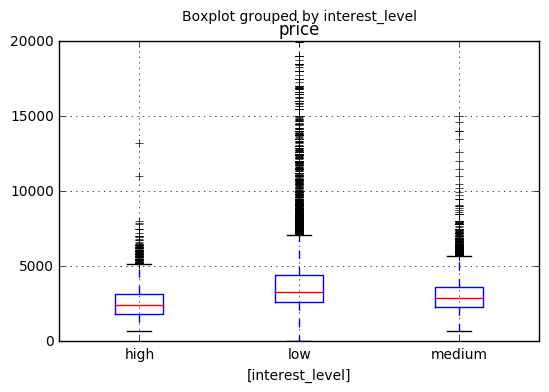

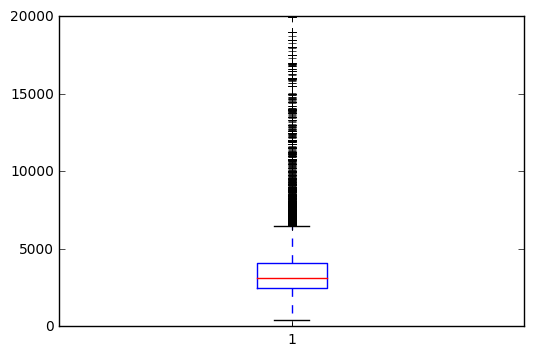

In [9]:
train_data[['price','interest_level']].boxplot(by='interest_level')
plt.ylim([0,20000])
plt.show()
plt.boxplot(list(train_data.price))
plt.ylim([0,20000])
plt.show()

In [10]:
price, Lambda = stat.boxcox(train_data['price'])
Lambda

-0.36183778888222939

{'boxes': [<matplotlib.lines.Line2D at 0x14cead610>],
 'caps': [<matplotlib.lines.Line2D at 0x154bfb510>,
 'fliers': [<matplotlib.lines.Line2D at 0x155195810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1551951d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x14cead7d0>,
  <matplotlib.lines.Line2D at 0x14ceade90>]}

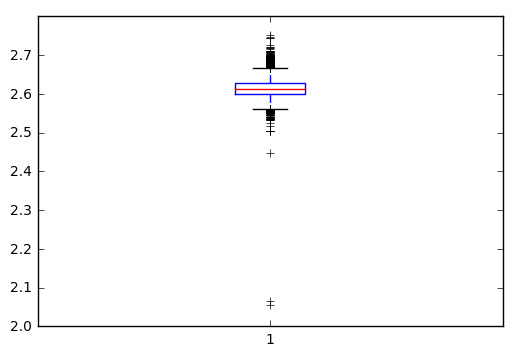

In [11]:
plt.boxplot(price)